# Number of cells and Stem cell fraction vs time
We average the number of cells over the realizations with the same $p_s$, $p_d$, and $t$ to get the average evolution for those probabilities.

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the DataFrame

In [2]:
df = pd.read_csv("./sim_15.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culture_id         864 non-null    int64  
 1   pd                 864 non-null    float64
 2   ps                 864 non-null    float64
 3   rng_seed           864 non-null    int64  
 4   time               864 non-null    int64  
 5   total_cells        864 non-null    int64  
 6   active_cells       864 non-null    int64  
 7   stem_cells         864 non-null    int64  
 8   active_stem_cells  864 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.9 KB


In [5]:
# Group by 'time', 'ps', and 'pd' and calculate the mean
average_df = df.groupby(["time", "ps", "pd"]).mean()

# we can drop the columns that are not relevant for the average
average_df = average_df[
    ["total_cells", "active_cells", "stem_cells", "active_stem_cells"]
]

# Reset the index if you want 'time', 'ps', and 'pd' as regular columns
average_df.reset_index(inplace=True)

average_df

,time,ps,pd,total_cells,active_cells,stem_cells,active_stem_cells
0,0,0.77,0.0,1.000000,1.000000,1.000000,1.000000
1,0,0.78,0.0,1.000000,1.000000,1.000000,1.000000
2,0,0.79,0.0,1.000000,1.000000,1.000000,1.000000
3,1,0.77,0.0,2.000000,2.000000,1.791667,1.791667
4,1,0.78,0.0,2.000000,2.000000,1.791667,1.791667
5,1,0.79,0.0,2.000000,2.000000,1.791667,1.791667
6,2,0.77,0.0,4.000000,4.000000,3.000000,3.000000
7,2,0.78,0.0,4.000000,4.000000,3.041667,3.041667
8,2,0.79,0.0,4.000000,4.000000,3.083333,3.083333
9,3,0.77,0.0,8.000000,8.000000,5.208333,5.208333


In [9]:
# Group by 'time', 'ps', and 'pd', then calculate mean and standard deviation
aggregated_df = df.groupby(["time", "ps", "pd"]).agg(
    {
        "total_cells": ["mean", "std"],
        "active_cells": ["mean", "std"],
        "stem_cells": ["mean", "std"],
        "active_stem_cells": ["mean", "std"],
    }
)

# Reset the index to make 'time', 'ps', and 'pd' regular columns
aggregated_df.reset_index(inplace=True)

# Optionally, you can flatten the column names
aggregated_df.columns = [
    "_".join(col).strip() if col[1] else col[0]
    for col in aggregated_df.columns.values
]

In [16]:
aggregated_df.loc[aggregated_df["time"].isin([7, 8, 9, 10, 11])][
    [
        "time",
        "ps",
        "total_cells_mean",
        "total_cells_std",
        "stem_cells_mean",
        "stem_cells_std",
    ]
]

,time,ps,total_cells_mean,total_cells_std,stem_cells_mean,stem_cells_std
21,7,0.77,111.583333,2.888006,46.125000,19.056695
22,7,0.78,112.083333,3.202128,47.125000,20.206139
23,7,0.79,112.125000,2.878896,49.000000,19.343575
24,8,0.77,190.041667,5.034483,70.291667,29.786894
25,8,0.78,190.416667,4.986213,72.500000,32.359395
26,8,0.79,190.458333,5.702625,74.833333,30.873749
27,9,0.77,303.541667,7.906954,101.875000,44.044752
28,9,0.78,304.000000,7.471686,104.916667,47.896552
29,9,0.79,303.416667,8.171619,108.833333,46.271098
30,10,0.77,461.875000,11.707718,141.125000,62.122818


In [17]:
aggregated_df.loc[aggregated_df["time"].isin([10])][
    [
        "time",
        "ps",
        "total_cells_mean",
        "total_cells_std",
        "stem_cells_mean",
        "stem_cells_std",
    ]
]

,time,ps,total_cells_mean,total_cells_std,stem_cells_mean,stem_cells_std
30,10,0.77,461.875000,11.707718,141.125000,62.122818
31,10,0.78,462.583333,10.922321,145.500000,66.894466
32,10,0.79,460.875000,10.987394,150.333333,64.251995


In [18]:
print(
    aggregated_df.loc[aggregated_df["time"].isin([10])][
        [
            "time",
            "ps",
            "total_cells_mean",
            "total_cells_std",
            "stem_cells_mean",
            "stem_cells_std",
        ]
    ]
)

    time    ps  total_cells_mean  total_cells_std  stem_cells_mean   
30    10  0.77        461.875000        11.707718       141.125000  \
31    10  0.78        462.583333        10.922321       145.500000   
32    10  0.79        460.875000        10.987394       150.333333   

    stem_cells_std  
30       62.122818  
31       66.894466  
32       64.251995  


Mirando la columna `total_cells`, podemos ver que $$ S(t=10, ps = 0.77) \simeq 141 \pm 62  $$ $$ S(t=10, ps=0.78) \simeq 146 \pm 67  $$ $$ S(t=10, ps = 0.79) \simeq 150 \pm 64  $$

## $t=9$
(Ver explicación en RJ-2023.11.01.)

In [37]:
df_t_9 = (
    average_df.loc[average_df["time"].isin([9])]
    .groupby(["ps", "pd", "time"])
    .mean()
)  # [['ps', 'total_cells', 'active_cells', 'stem_cells', 'active_stem_cells']]
df_t_9.reset_index(inplace=True)
df_t_9

,ps,pd,time,total_cells,active_cells,stem_cells,active_stem_cells
0,0.10,0.0,9,300.500,300.500,5.000,5.000
1,0.20,0.0,9,300.500,300.500,5.000,5.000
2,0.30,0.0,9,300.500,300.500,5.000,5.000
3,0.40,0.0,9,302.500,302.500,26.000,26.000
4,0.45,0.0,9,303.500,303.500,32.500,32.500
5,0.50,0.0,9,298.500,298.500,32.500,32.500
6,0.55,0.0,9,299.500,299.500,58.500,58.500
7,0.60,0.0,9,299.500,299.500,60.500,60.500
8,0.65,0.0,9,306.875,306.875,70.375,70.375
9,0.66,0.0,9,307.125,307.125,73.500,73.500


En las imágenes experimentales, segmentamos 490, con 188 madres, en total, sin filtrar ni identificar unos con otros. Si el cultivo experimental fuera de 9 días (asumiendo un tiempo de autorreplicación de 1 día), no da el total de células, y para tener el número de madres tendríamos que tener $0.8<p_s<0.85$. Si tomamos sólo la slice 4 (injustificable), tendríamos 301 células con 102 madres, lo cuál equivaldría a $p_s \simeq 0.71$.

## $t=10$

In [39]:
df_t_10 = (
    average_df.loc[average_df["time"].isin([10])]
    .groupby(["ps", "pd", "time"])
    .mean()
)  # [['ps', 'total_cells', 'active_cells', 'stem_cells', 'active_stem_cells']]
df_t_10.reset_index(inplace=True)
df_t_10

,ps,pd,time,total_cells,active_cells,stem_cells,active_stem_cells
0,0.10,0.0,10,457.000,457.000,5.000,5.000
1,0.20,0.0,10,457.000,457.000,5.000,5.000
2,0.30,0.0,10,457.000,457.000,5.000,5.000
3,0.40,0.0,10,462.500,462.500,32.000,32.000
4,0.45,0.0,10,461.500,461.500,41.500,41.500
5,0.50,0.0,10,450.500,450.500,41.500,41.500
6,0.55,0.0,10,454.250,454.250,75.500,75.500
7,0.60,0.0,10,452.250,452.250,79.750,79.750
8,0.65,0.0,10,465.125,465.125,91.125,91.125
9,0.66,0.0,10,467.250,467.250,97.500,97.500


In [41]:
print(df_t_10)

      ps   pd  time  total_cells  active_cells  stem_cells  active_stem_cells
0   0.10  0.0    10      457.000       457.000       5.000              5.000
1   0.20  0.0    10      457.000       457.000       5.000              5.000
2   0.30  0.0    10      457.000       457.000       5.000              5.000
3   0.40  0.0    10      462.500       462.500      32.000             32.000
4   0.45  0.0    10      461.500       461.500      41.500             41.500
5   0.50  0.0    10      450.500       450.500      41.500             41.500
6   0.55  0.0    10      454.250       454.250      75.500             75.500
7   0.60  0.0    10      452.250       452.250      79.750             79.750
8   0.65  0.0    10      465.125       465.125      91.125             91.125
9   0.66  0.0    10      467.250       467.250      97.500             97.500
10  0.67  0.0    10      463.000       463.000     117.875            117.875
11  0.68  0.0    10      464.375       464.375     114.500      

En las imágenes experimentales, segmentamos 490, con 188 madres, en total, sin filtrar ni identificar unos con otros. Si el cultivo experimental fuera de 10 días (asumiendo un tiempo de autorreplicación de 1 día), sigue sin dar el total de células, aunque está más cerca, y para tener el número de madres tendríamos que tener $0.76<p_s<0.8$.

## Making the plot

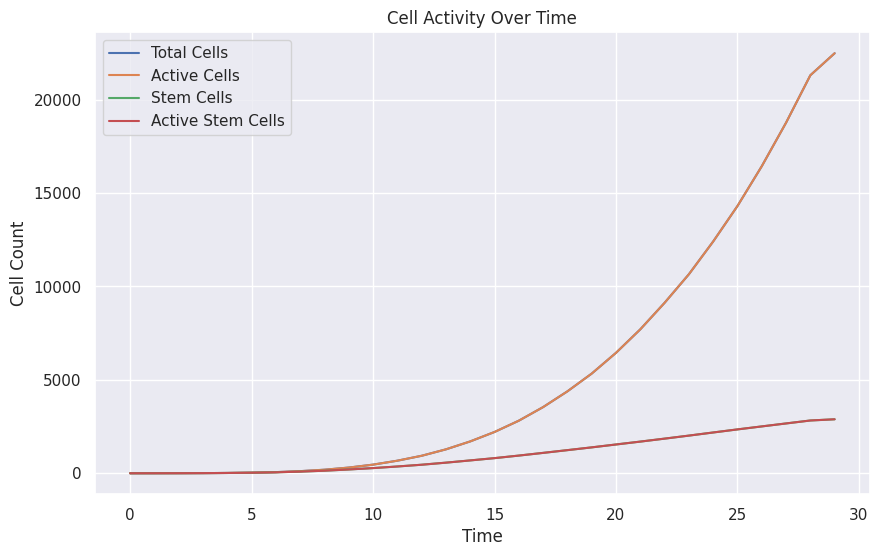

In [5]:
# Set the theme
sns.set_theme(style="darkgrid")

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create line plots for each desired column against 'time'
sns.lineplot(x="time", y="total_cells", data=df_culture_1, label="Total Cells")
sns.lineplot(
    x="time", y="active_cells", data=df_culture_1, label="Active Cells"
)
sns.lineplot(x="time", y="stem_cells", data=df_culture_1, label="Stem Cells")
sns.lineplot(
    x="time",
    y="active_stem_cells",
    data=df_culture_1,
    label="Active Stem Cells",
)

# Add title and labels
plt.title("Cell Activity Over Time")
plt.xlabel("Time")
plt.ylabel("Cell Count")

# Add legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

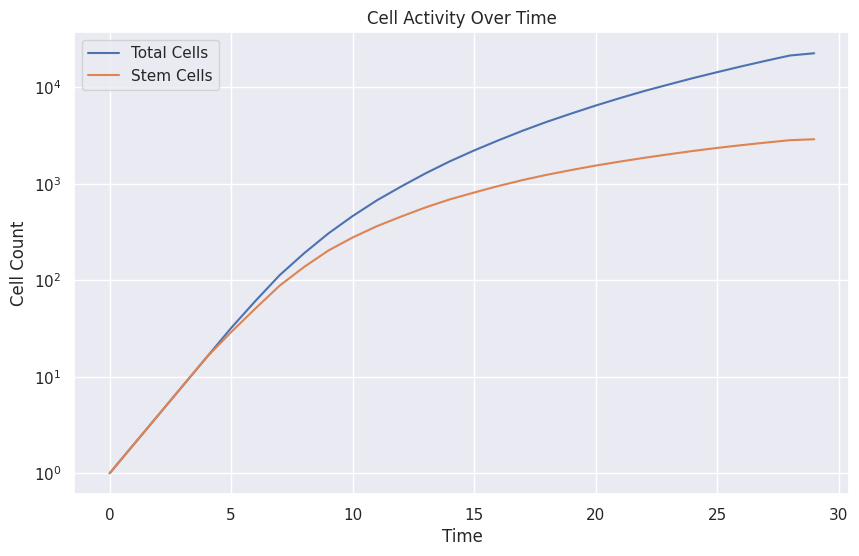

In [7]:
# Set the theme
sns.set_theme(style="darkgrid")

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create line plots for each desired column against 'time'
sns.lineplot(x="time", y="total_cells", data=df_culture_1, label="Total Cells")
# sns.lineplot(
#     x="time", y="active_cells", data=df_culture_1, label="Active Cells"
# )
sns.lineplot(x="time", y="stem_cells", data=df_culture_1, label="Stem Cells")
# sns.lineplot(
#     x="time",
#     y="active_stem_cells",
#     data=df_culture_1,
#     label="Active Stem Cells",
# )

# Add title and labels
plt.title("Cell Activity Over Time")
plt.xlabel("Time")
plt.ylabel("Cell Count")
plt.yscale("log")

# Add legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

## Comparing with the old simulations
We compare this new curves with the ones produced by the first versions of the code.

In [20]:
df_old = pd.read_csv("./sample_old_dat_file__0.1-1.dat")
df_old

,total_cells,active_cells,stem_cells,active_stem_cells
0,1.0,1.0,1.0,1.0
1,2.0,2.0,1.0,1.0
2,4.0,4.0,1.0,1.0
3,8.0,8.0,2.0,2.0
4,16.0,16.0,2.0,2.0
...,...,...,...,...
56,209467.0,24064.0,6.0,0.0
57,221984.0,25034.0,6.0,0.0
58,234886.0,25804.0,6.0,0.0
59,248354.0,26936.0,6.0,0.0


Let's add the time column and filter up to 29 days.

In [28]:
df_old["time"] = df_old.index + 1
df_old

,total_cells,active_cells,stem_cells,active_stem_cells,time
0,1.0,1.0,1.0,1.0,1
1,2.0,2.0,1.0,1.0,2
2,4.0,4.0,1.0,1.0,3
3,8.0,8.0,2.0,2.0,4
4,16.0,16.0,2.0,2.0,5
...,...,...,...,...,...
56,209467.0,24064.0,6.0,0.0,57
57,221984.0,25034.0,6.0,0.0,58
58,234886.0,25804.0,6.0,0.0,59
59,248354.0,26936.0,6.0,0.0,60


In [30]:
df_old_filtered = df_old.loc[df_old["time"] < 30]
df_old_filtered = df_old_filtered[
    ["time", "total_cells", "active_cells", "stem_cells", "active_stem_cells"]
]

In [31]:
df_old_filtered

,time,total_cells,active_cells,stem_cells,active_stem_cells
0,1,1.0,1.0,1.0,1.0
1,2,2.0,2.0,1.0,1.0
2,3,4.0,4.0,1.0,1.0
3,4,8.0,8.0,2.0,2.0
4,5,16.0,16.0,2.0,2.0
5,6,32.0,32.0,2.0,2.0
6,7,63.0,62.0,2.0,2.0
7,8,115.0,104.0,2.0,2.0
8,9,191.0,152.0,2.0,2.0
9,10,298.0,214.0,2.0,2.0


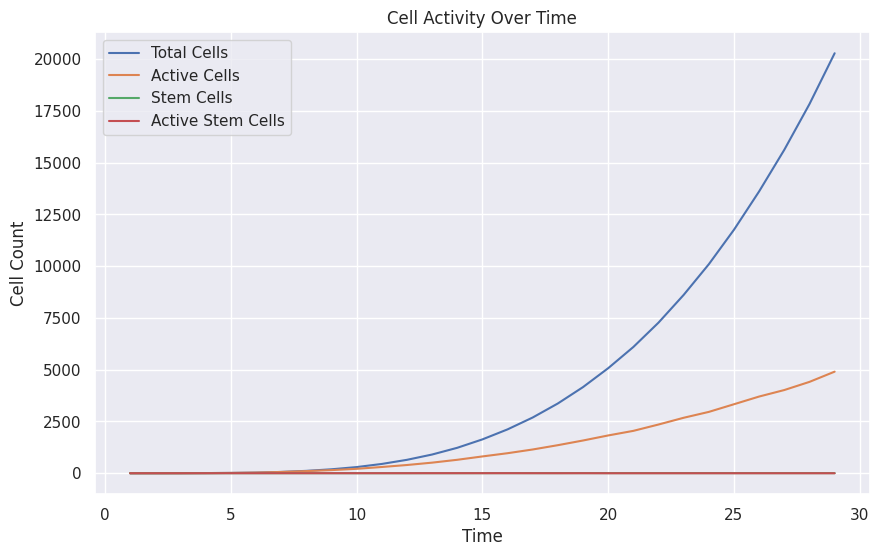

In [32]:
# Set the theme
sns.set_theme(style="darkgrid")

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create line plots for each desired column against 'time'
sns.lineplot(
    x="time", y="total_cells", data=df_old_filtered, label="Total Cells"
)
sns.lineplot(
    x="time", y="active_cells", data=df_old_filtered, label="Active Cells"
)
sns.lineplot(
    x="time", y="stem_cells", data=df_old_filtered, label="Stem Cells"
)
sns.lineplot(
    x="time",
    y="active_stem_cells",
    data=df_old_filtered,
    label="Active Stem Cells",
)

# Add title and labels
plt.title("Cell Activity Over Time")
plt.xlabel("Time")
plt.ylabel("Cell Count")

# Add legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

Grafiquemos las poblaciones totales en ambos casos (recordemos que el código original no era isotrópico).

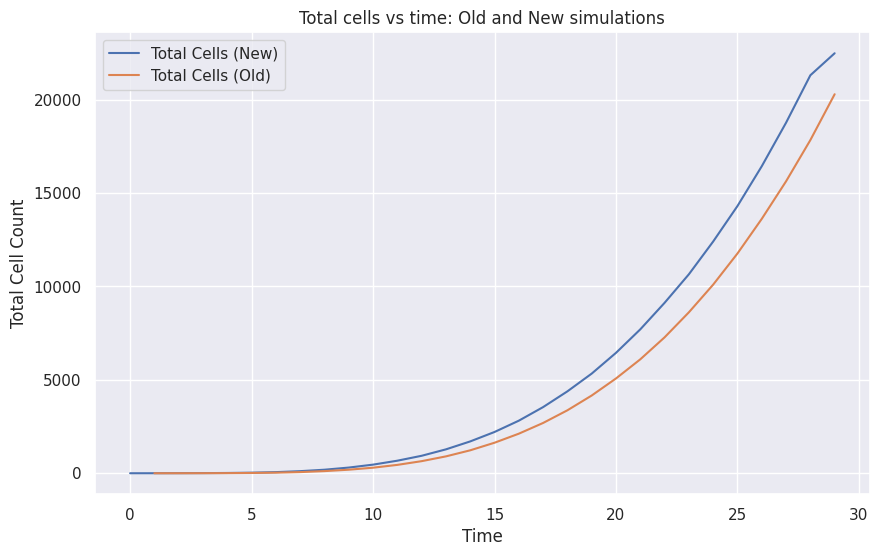

In [33]:
# Set the theme
sns.set_theme(style="darkgrid")

# Initialize the figure
plt.figure(figsize=(10, 6))

# Create line plots for each desired column against 'time'
sns.lineplot(
    x="time", y="total_cells", data=df_culture_1, label="Total Cells (New)"
)
sns.lineplot(
    x="time", y="total_cells", data=df_old_filtered, label="Total Cells (Old)"
)

# Add title and labels
plt.title("Total cells vs time: Old and New simulations")
plt.xlabel("Time")
plt.ylabel("Total Cell Count")

# Add legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()